**The objective of this question is to analyze atmospheric CO2 concentration data using
the CO2 dataset from the statsmodels library.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

co2_data = sm.datasets.co2.load_pandas().data
monthly_co2_data = np.round(co2_data.resample('M').mean(), 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_2988\1987564093.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_co2_data = np.round(co2_data.resample('M').mean(), 1)


**(a)** Implement a function that generates a line plot of the CO2 concentrations over time.

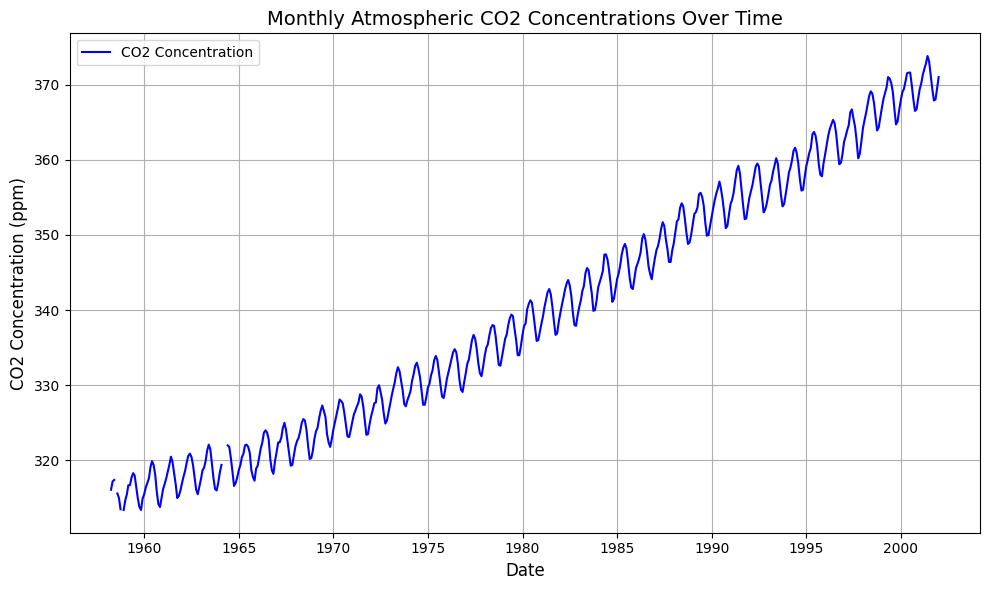

In [2]:
def plot_CO2_concentrations(monthly_co2_data):
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_co2_data.index, monthly_co2_data['co2'], label="CO2 Concentration", color='b')
    plt.title('Monthly Atmospheric CO2 Concentrations Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_CO2_concentrations(monthly_co2_data)

**(b)** Implement a function that handles missing data using both forward fill and linear interpolation methods, and plots the original data along with the filled data.

C:\Users\hp\AppData\Local\Temp\ipykernel_2988\3316496562.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = data_range_filtered['co2'].fillna(method='ffill')


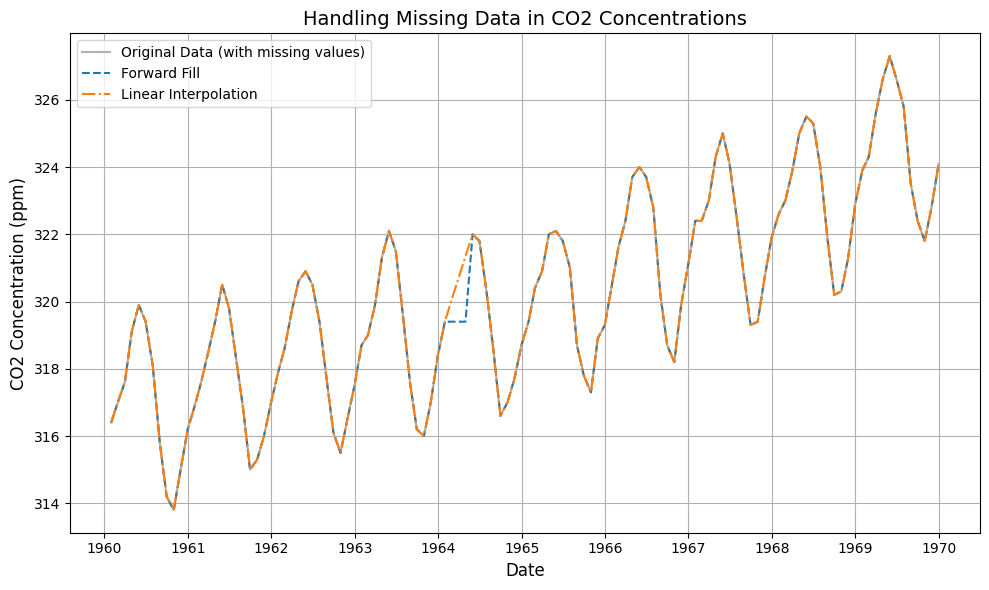

In [3]:
def handle_missing_data(monthly_co2_data, date_range=('1960-01-01', '1970-01-01')):
    data_range_filtered = monthly_co2_data.loc[date_range[0]:date_range[1]]
    forward_filled = data_range_filtered['co2'].fillna(method='ffill')
    linear_interpolated = data_range_filtered['co2'].interpolate(method='linear')
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_range_filtered.index, data_range_filtered['co2'], label="Original Data (with missing values)", color='#B0B0B0')
    plt.plot(data_range_filtered.index, forward_filled, label="Forward Fill", color='#1f77b4', linestyle='--')
    plt.plot(data_range_filtered.index, linear_interpolated, label="Linear Interpolation", color='#ff7f0e', linestyle='-.')
    
    plt.title(f'Handling Missing Data in CO2 Concentrations', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('CO2 Concentration (ppm)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
handle_missing_data(monthly_co2_data)

**(c)** Implement a function that performs a time series decomposition to extract and plot the trend, seasonal, and residual components of the CO2 concentrations.

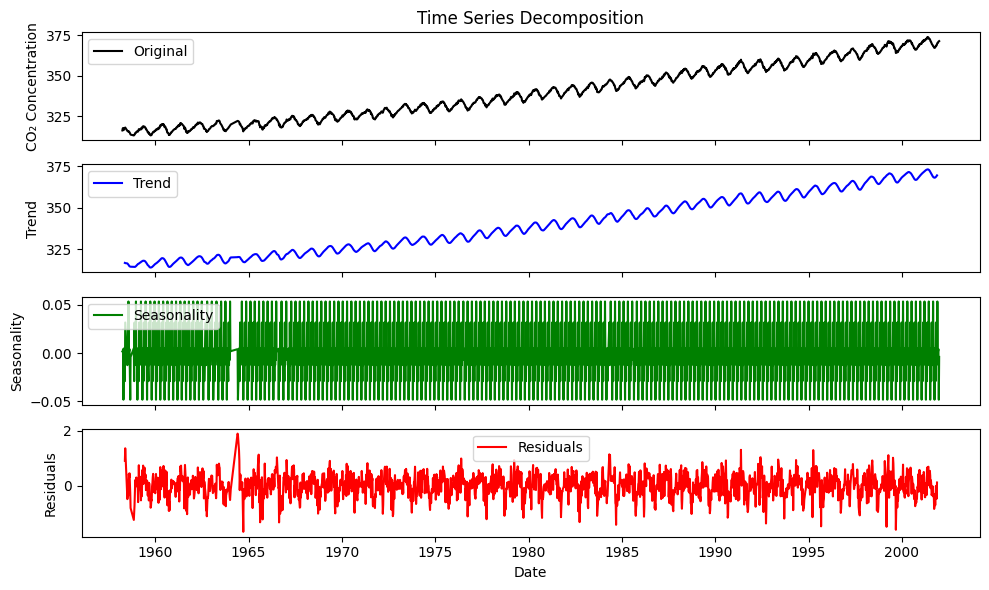

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
monthly_co2_data = np.round(co2_data, 1)

def decompose_time_series(monthly_co2_data):
    monthly_co2_data = monthly_co2_data.dropna()
    decomposition = seasonal_decompose(monthly_co2_data, model='additive', period=12)  
    fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    
    axes[0].plot(monthly_co2_data, label="Original", color="black")
    axes[0].set_ylabel("CO₂ Concentration")
    axes[0].set_title("Time Series Decomposition")
    axes[0].legend()

    # Trend Component
    axes[1].plot(decomposition.trend, label="Trend", color="blue")
    axes[1].set_ylabel("Trend")
    axes[1].legend()

    # Seasonal Component
    axes[2].plot(decomposition.seasonal, label="Seasonality", color="green")
    axes[2].set_ylabel("Seasonality")
    axes[2].legend()

    # Residual Component
    axes[3].plot(decomposition.resid, label="Residuals", color="red")
    axes[3].set_ylabel("Residuals")
    axes[3].legend()

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

decompose_time_series(monthly_co2_data)